In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') #Gives us whitegrid background
#for all our visualizations
%matplotlib inline


In [10]:
from pandas_datareader import DataReader 
#lets us read stock info from google or yahoo financepip insta

In [11]:
from datetime import datetime #using datetime to set
#start and end time of our datagrab

In [12]:
from __future__ import division 

In [13]:
tech_list = ['AAPL', 'GOOG','MSFT','AMZN'] #tech stock
#ticker list

In [14]:
end = datetime.now()#today

start = datetime(end.year-1,end.month,end.day)
#start time is now 1 year ago from todays date

In [15]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)
#for every stock in the list, Datareader takes the ticker
#and specified website, start and end dates andthen returns
#the stock information. 
#Globals takes that stock tickers and makes it into a 
#global variable so if you call the ticker it displays
#a dataframe anywhere now

In [16]:
AAPL.describe() 
#describes the data. 
#We'll be using the adj close price history since it is the one that is usually used for stock analysis

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,192.448526,188.735936,190.578287,190.696614,3.202585e+07,189.454603
std,21.602084,21.336309,21.455961,21.440843,1.429438e+07,21.115315
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,141.582779
25%,175.395004,172.904999,174.300003,174.570000,2.238685e+07,174.101929
50%,190.679993,187.649994,189.529999,188.839996,2.821540e+07,188.158646
75%,209.375000,206.379997,207.360001,207.760002,3.856335e+07,206.634377
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,230.275482


In [17]:
AAPL.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-04-27 to 2019-04-26
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


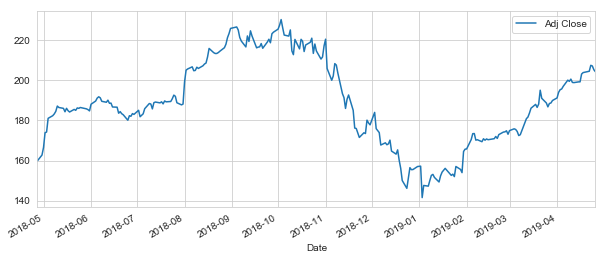

In [18]:
AAPL['Adj Close'].plot(legend = True, figsize=(10,4))
#closing price over past year

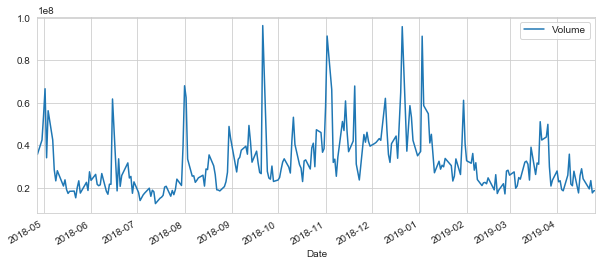

In [19]:
AAPL['Volume'].plot(legend=True, figsize = (10,4))
#volume of stock traded over past year

In [20]:
#creating a 10, 20 and 50 day moving 
#average graph
ma_day = [20,50,100,5]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()
#so we're creating 3 new columns. a moving average for 10, 20 and 30 days. 
#pd.rolling_mean makes this from the adj close column and the taken interval is from the list

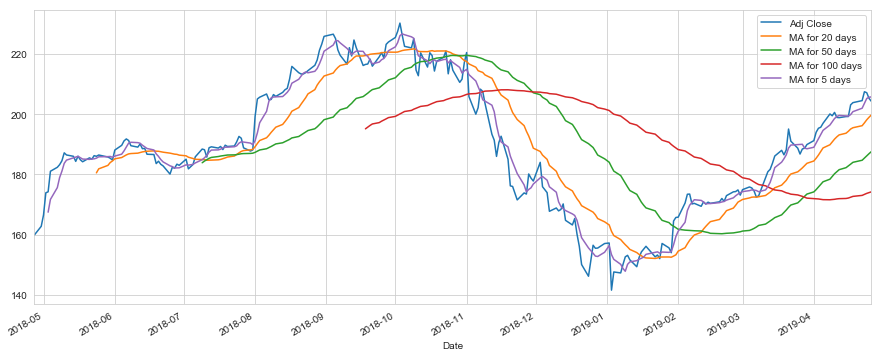

In [21]:
AAPL[['Adj Close', 'MA for 20 days','MA for 50 days','MA for 100 days', 'MA for 5 days']].plot(subplots=False, figsize = (15,6))

In [22]:
#check moving averages out on wiki

In [23]:

#Daily returns and risk of the stock:

In [24]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
#created new column which is the percent change per
#day for the adjusted close price

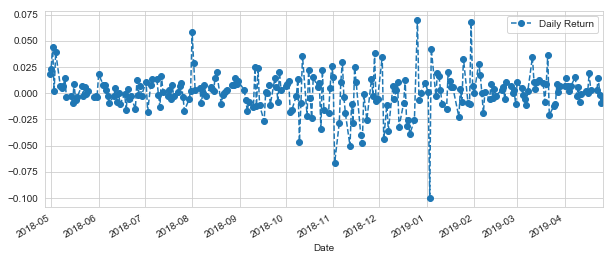

In [25]:
AAPL['Daily Return'].plot(figsize= (10,4),
                          legend = True, linestyle = '--', marker = 'o')

In [26]:
#Based on the daily return we can figure out things like risk

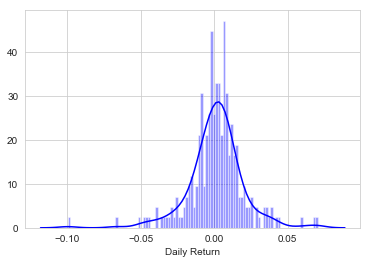

In [27]:
#average daily return for past year:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100,
            color = 'blue')

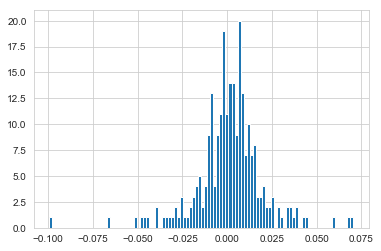

In [28]:
AAPL['Daily Return'].hist(bins=100) 

In [29]:
#If we wanted to analyze the return of all the stocks in our list how would we do that?
#Create dataframe using DataReader to read stocks from the web
#used start and end dates. Also specified we only want adj close columns
closing_df = DataReader(tech_list, 'yahoo', start,end)['Adj Close']

In [30]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-04-27,159.885406,1572.619995,1030.050049,94.229485
2018-04-30,162.781296,1566.130005,1017.330017,91.967659
2018-05-01,166.563705,1582.260010,1037.310059,93.423088
2018-05-02,173.921677,1569.680054,1024.380005,91.957832
2018-05-03,174.236862,1572.079956,1023.719971,92.508530


In [31]:
tech_rets=closing_df.pct_change()


In [32]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-04-27,NaN,NaN,NaN,NaN
2018-04-30,0.018112,-0.004127,-0.012349,-0.024003
2018-05-01,0.023236,0.010299,0.019640,0.015825
2018-05-02,0.044175,-0.007951,-0.012465,-0.015684
2018-05-03,0.001812,0.001529,-0.000644,0.005989


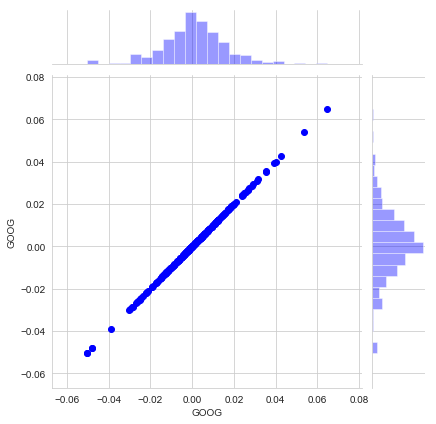

In [33]:
#comparing two stocks' daily return:
sns.jointplot('GOOG','GOOG',data=tech_rets, color = 'blue')
#here we have a perfectly linear relationship since we're
#looking at a comparison of the same stock

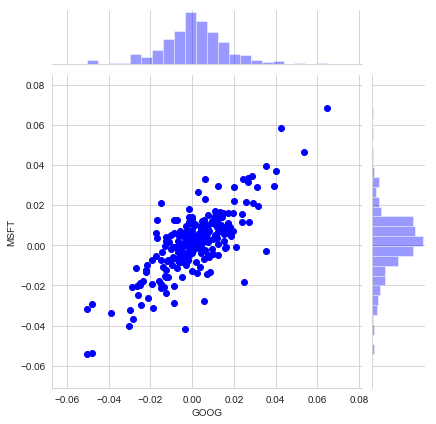

In [34]:
sns.jointplot('GOOG','MSFT',data=tech_rets, color = 'blue')


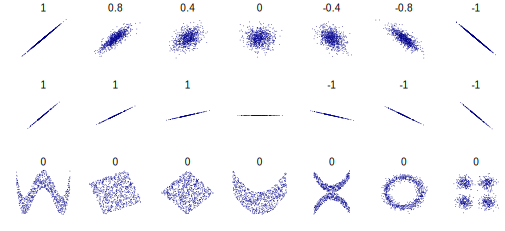

In [35]:
from IPython.display import SVG
SVG(url = 'http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

In [36]:
#Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. 
#We can use sns.pairplot() to automatically create this  plot

In [37]:
tech_rets.head()


Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-04-27,NaN,NaN,NaN,NaN
2018-04-30,0.018112,-0.004127,-0.012349,-0.024003
2018-05-01,0.023236,0.010299,0.019640,0.015825
2018-05-02,0.044175,-0.007951,-0.012465,-0.015684
2018-05-03,0.001812,0.001529,-0.000644,0.005989


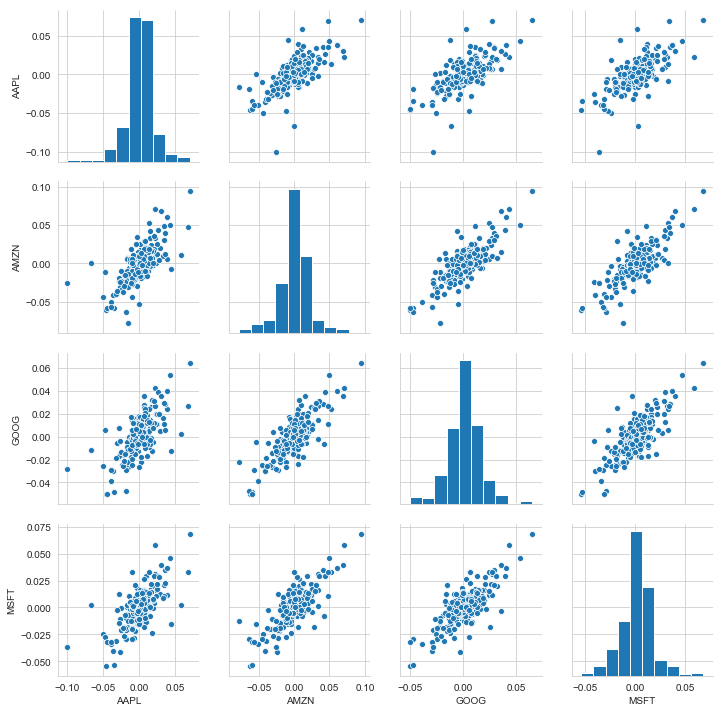

In [38]:
sns.pairplot(data=tech_rets.dropna())
#Gives you all the histograms on the diagonal. 
#upper and lower triangular graphs are correlation graphs.
#This is a much faster way of comparing all the stocks quickly

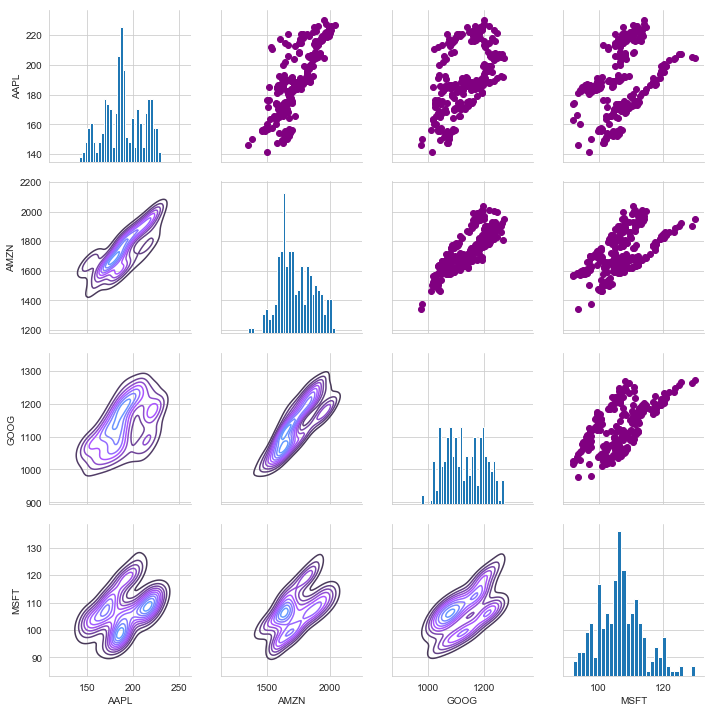

In [39]:

#comparing closing prices
returns_fig = sns.PairGrid(data = closing_df)

#decide to make upper triangular graphs be scatter plots
returns_fig.map_upper(plt.scatter,color='purple')

#KDE plot for lower triangulars
returns_fig.map_lower(sns.kdeplot,cmap = 'cool_d')

#diagonal as histograms
returns_fig.map_diag(plt.hist,bins=30)

In [40]:

corr_tech = tech_rets.corr()

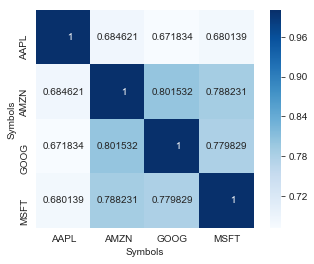

In [41]:
sns.heatmap(data = corr_tech,
           fmt = '6g', square = True, 
            cmap = 'Blues', annot = True)
#figure out what is a good "correlation" threshold

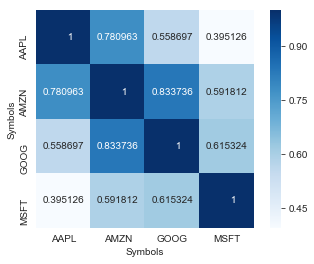

In [42]:

sns.heatmap(data = closing_df.corr(),
           fmt = '6g', square = True, 
            cmap = 'Blues', annot = True)


In [43]:
#Now we will dive into risk analysis

In [44]:
rets = tech_rets.dropna()

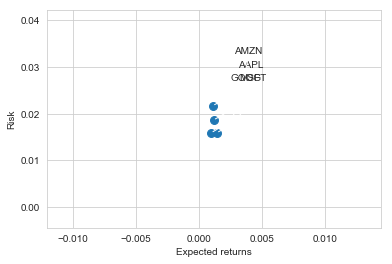

In [45]:
area = np.pi*20 #the area is used to define the area for the circles in the plot

plt.scatter(x=rets.mean(), y=rets.std(), s = area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy= (x, y), xytext = (50,50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad = -0.3'))

#rets.mean is expected returns and standard deviation is known as risk

In [46]:
#Value at risk
#pretty much the amount of money we'd expect to lose for a given confidence interval.
#Method 1 Bootstrap method:
#calculate the empirical quantities from a histogram of daily returns


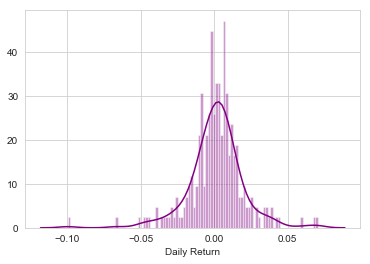

In [47]:

sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, 
             color = 'purple')

In [48]:
rets.head() #returns dataframe we made

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-04-30,0.018112,-0.004127,-0.012349,-0.024003
2018-05-01,0.023236,0.010299,0.019640,0.015825
2018-05-02,0.044175,-0.007951,-0.012465,-0.015684
2018-05-03,0.001812,0.001529,-0.000644,0.005989
2018-05-04,0.039233,0.005642,0.023923,0.011587


In [49]:
rets['MSFT'].quantile(0.05) 
#the 0.05 empirical qunatile of daily returns is -0.026 for MSFT. That
#means that with 95% confidene, our worst daily loss will not exceed
# 1.9%. So if we have 50,000 dollar investment, our one day 5% VaR
# is $1300 for the past year.SO 95% of the time, the worst you can lose
#per day is 2.6% of your investment for the past year

-0.02716398026451105

In [50]:
rets['MSFT'].quantile(0.95)

0.028912699724152655

In [51]:
#Value at risk using the Monte Carlo Method:
#use Monte Carlo method to run many trials w/ random market conditions,
#then we'll calculate portfolio losses for each trial. After that,
# we use the aggregation of all these simulations to establish how 
#risky the stock is

In [52]:
#We'll use the geometric bronian motion(GBM) which is technically known 
#as a Markov process. Stock price will follow a random walk
#and is consistent with the weak form of the efficient market hypothesis
#(EMH). 

In [53]:
#setup time horizon: (Doing this just for google right now)
days = 365

dt = 1/days

mu = rets.mean()['GOOG'] #mu is your average, associated with the 'drift'

sigma = rets.std()['GOOG'] #volatility of stock. 

#This is all in terms of the monte carlo method outlined on 
#investopedia

In [54]:
#make a function that takes in starting price,days, mu and sigma to
#
def stock_monte_carlo(start_price, days, mu, sigma):
    
    price = np.zeros(days) #array of the days in the year
    price[0] = start_price #price for the indexed day, setting initial price
    
    shock = np.zeros(days)
    drift = np.zeros(days) #shock and drift arrays
    
    for x in range(1, days): #from 1 to days in that range
        shock[x] = np.random.normal(loc=mu*dt, scale = sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price #should return price a price array

In [55]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-04-27,1049.500000,1025.589966,1046.000000,1030.050049,1619800,1030.050049
2018-04-30,1037.000000,1016.849976,1030.010010,1017.330017,1671300,1017.330017
2018-05-01,1038.469971,1008.210022,1013.659973,1037.310059,1427900,1037.310059
2018-05-02,1040.389038,1022.869995,1028.099976,1024.380005,1603100,1024.380005
2018-05-03,1029.675049,1006.289978,1019.000000,1023.719971,1815100,1023.719971


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

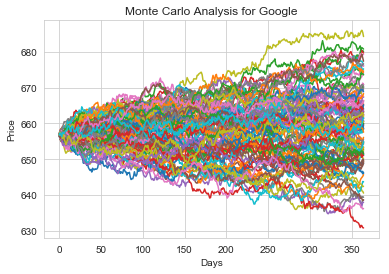

In [56]:
start_price = 656.80 #set google's start price by looking at the stock data

#plot the price array you return from using the function we defined above:
for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [57]:
#clearly there's a bit of variability in prediction. So we can make
#sense of this with a histogram.
#first lets make a larger simulation than just 100:

runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

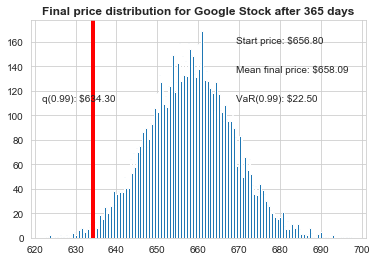

In [58]:

#we can use quantile to define our risk for this stock. 
q = np.percentile(simulations, 1) #when doing our analysis, 99% of our 
#values should fit within our output
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
#the Value at Risk for each google stick is 23.18. This means the amount
#of money you'd lose at MOST 99% of the time is 23.18.
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');